In [1]:
import numpy as np  # Import the NumPy library for numerical operations.
import pandas as pd  #  Import the pandas library for data manipulation and analysis.
import seaborn as sns  # Import the seaborn library for data visualization.
import matplotlib.pyplot as plt # Import the matplotlib library for creating static, interactive, and animated visualizations.
import warnings  # Import the warnings library to handle warning messages.
warnings.filterwarnings("ignore")  # Ignore warning messages to keep the output clean.

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df .shape  # Display the shape of the DataFrame to understand its dimensions.

(1338, 7)

In [4]:
dtypes = df.dtypes  # Get the data types of each column in the DataFrame.
n_unique = df.nunique()  # Get the number of unique values in each column.
print(n_unique)  # Print the number of unique values to the console for inspection.
print(dtypes)  # Print the data types to the console for inspection.
pd.DataFrame({'dtypes': dtypes, 'n_unique': n_unique}).T  # Create a DataFrame to summarize the data types and unique counts of each column.

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


,age,sex,bmi,children,smoker,region,charges
dtypes,int64,object,float64,int64,object,object,float64
n_unique,47,2,548,6,2,4,1337


In [5]:
def chk_types (df):
    dtypes = df.dtypes  # Get the data types of each column in the DataFrame.
    n_unique = df.nunique()
    return pd.DataFrame({'dtypes': dtypes, 'n_unique': n_unique}).T

chk_types(df)  # Call the function to check the data types and unique counts of each column in the DataFrame.

,age,sex,bmi,children,smoker,region,charges
dtypes,int64,object,float64,int64,object,object,float64
n_unique,47,2,548,6,2,4,1337


In [6]:
cat_col = ['sex', 'smoker','children', 'region']  # List of categorical columns in the DataFrame.
df[cat_col]= df[cat_col].astype('category')  # Convert the specified columns to categorical data type.
chk_types(df)  # Call the function to check the data types and unique counts of each column in the DataFrame.


,age,sex,bmi,children,smoker,region,charges
dtypes,int64,category,float64,category,category,category,float64
n_unique,47,2,548,6,2,4,1337


In [7]:
null =df.isnull().sum()  # Calculate the number of null values in each column of the DataFrame.
ratio = (null / df.shape[0]) * 100   # Calculate the percentage of missing data for each column.
pd.DataFrame({'null': null, 'ratio': ratio}).T  # Create a DataFrame to summarize the number of null values and the percentage of missing data for each column.

,age,sex,bmi,children,smoker,region,charges
null,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def Chk_nulls (df):
    null = df. isnull() .sum()  # Count the number of null values in each column of the DataFrame
    ratio = (null/ df.shape[0]) *100
    pd.DataFrame({'null': null, 'ratio': ratio}) .T # Create a new DataFrame with the count and ratio of null values in each column

    return pd.DataFrame({'null': null, 'ratio': ratio}) .T  # Create a new DataFrame with the count and ratio of null values in each column

Chk_nulls(df)  # Call the function to check for null values in the DataFrame and display the results.

,age,sex,bmi,children,smoker,region,charges
null,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
def Chk_nulls (df):
    null = df. isnull() .sum()  # Count the number of null values in each column of the DataFrame
    ratio = round((null/ df.shape[0]) *100 ,2) .astype(str) + '%'  # Calculate the percentage of missing data for each column and format it as a string with a percentage sign.
    pd.DataFrame({'null': null, 'ratio': ratio}) .T # Create a new DataFrame with the count and ratio of null values in each column
    return pd.DataFrame({'null': null, 'ratio': ratio}) .T  # Create a new DataFrame with the count and ratio of null values in each column

Chk_nulls(df)  # Call the function to check for null values in the DataFrame and display the results.

,age,sex,bmi,children,smoker,region,charges
null,0,0,0,0,0,0,0
ratio,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


In [10]:
num_cols =df.select_dtypes('number').columns  # Select columns with numeric data types from the DataFrame.
num_cols  # Display the list of numeric columns.

Index(['age', 'bmi', 'charges'], dtype='object')

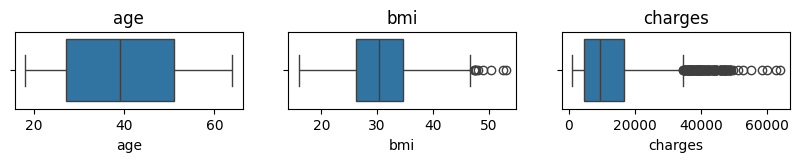

In [11]:
plt.figure(figsize=(10,1))  # Set the size of the plot.
for i , col in enumerate(num_cols):  # Iterate over the numeric columns.
    plt.subplot(1, len(num_cols), i+1)  # Create a subplot for each column.
    plt.title(f"{col}")  # Set the title of the subplot to the column name.
    sns.boxplot(df[col], orient='h')  # Create a horizontal box plot for the column.
plt.show()  # Display the plot.

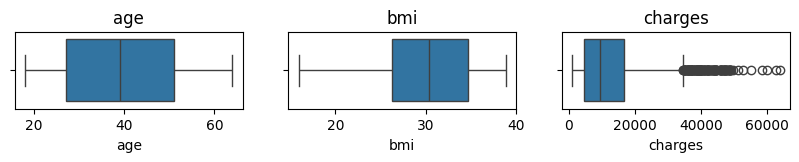

In [12]:
Q1 = df.bmi.quantile(0.25)  # Calculate the first quartile (25th percentile) of the BMI column.
Q3 = df.bmi.quantile(0.75)  # Calculate the third quartile (75th percentile) of the BMI column.
IQR = Q3 - Q1  # Calculate the interquartile range (IQR) of the BMI column.
upper = Q1 + 1.5 * IQR  # Calculate the lower bound of the BMI column.
upper_outliers = df[df[col] > upper][col].values

outliers = df[df.bmi > upper]. bmi.values  # Identify outliers in the BMI column that are greater than the upper bound.
df.bmi.replace(outliers ,upper, inplace=True)  # Replace the outliers in the BMI column with the upper bound value.

plt.figure(figsize=(10,1))  # Set the size of the plot.
for i , col in enumerate(num_cols):  # Iterate over the numeric columns.
    plt.subplot(1, len(num_cols), i+1)  # Create a subplot for each column.
    plt.title(f"{col}")  # Set the title of the subplot to the column name.
    sns.boxplot(df[col], orient='h')  # Create a horizontal box plot for the column.
plt.show()  # Display the plot.


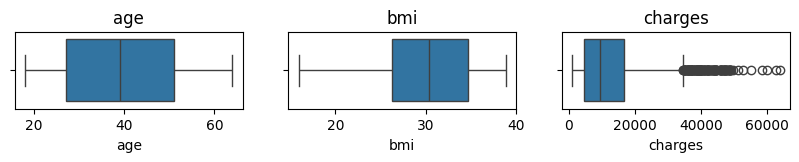

In [13]:
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR  # Correct upper bound

# Detect and replace outliers
upper_outliers = df[df["bmi"] > upper]["bmi"].values
df.bmi.replace(upper_outliers, upper, inplace=True)

# Plot boxplots for all numeric columns
plt.figure(figsize=(10, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    plt.title(f"{col}")
    sns.boxplot(x=df[col], orient="h")
plt.show()

In [14]:
num_col = ['age',  'bmi', ]
cat_col = ['sex', 'smoker','children', 'region']

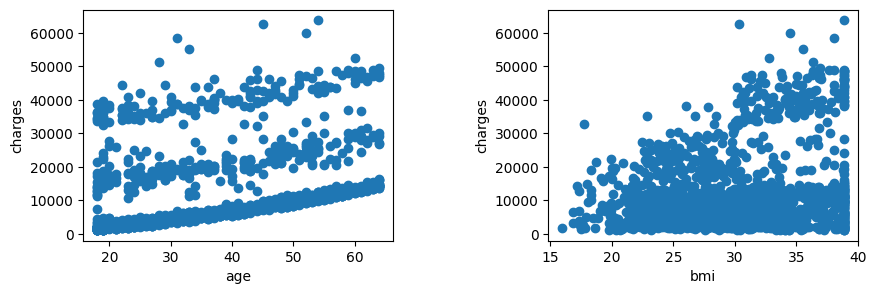

In [15]:
plt.figure(figsize=(10,3))  # Set the size of the plot.
for i , col in enumerate (num_col):  # Iterate over the numeric columns.
    plt.subplot(1,2,i+1)
    plt.xlabel(f'{col}')  # Set the x-axis label to the column name.
    plt.ylabel(f'charges')  # Set the y-axis label to 'charges'.
    plt.scatter(df[col], df['charges'])
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust the spacing between subplots.
plt.show()

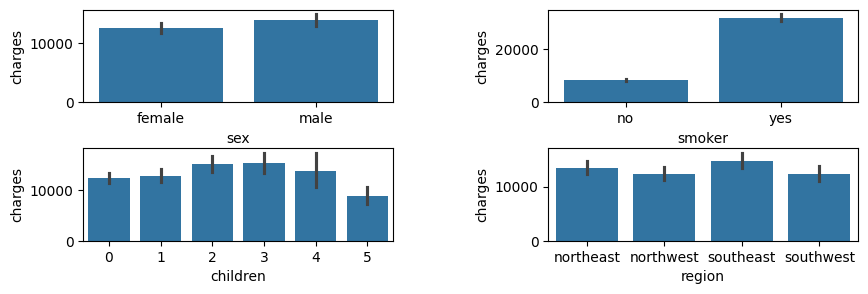

In [16]:
plt.figure(figsize=(10,3))  # Set the size of the plot.
for i , col in enumerate (cat_col):  # Iterate over the numeric columns.
    plt.subplot(2,2,i+1)
    plt.xlabel(f'{col}')  # Set the x-axis label to the column name.
    plt.ylabel(f'charges')  # Set the y-axis label to 'charges'.
    sns.barplot(x = col , y = 'charges' , data = df)
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust the spacing between subplots.
plt.show()

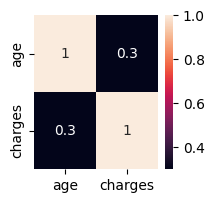

In [17]:
corr = df[['age', 'charges']].corr()
plt.figure(figsize=(2,2))  # Set the size of the plot.
sns.heatmap(corr, annot=True)
plt.show()

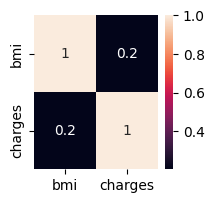

In [18]:
corr_2 = df[['bmi', 'charges']].corr()
plt.figure(figsize=(2,2))  # Set the size of the plot.
sns.heatmap(corr_2, annot=True)
plt.show()

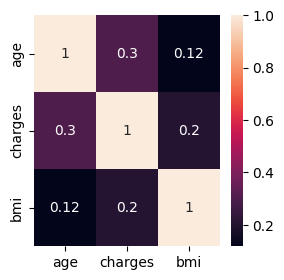

In [19]:
corr = df[['age', 'charges' , 'bmi']].corr()
plt.figure(figsize=(3,3))  # Set the size of the plot.
sns.heatmap(corr, annot=True)
plt.show()

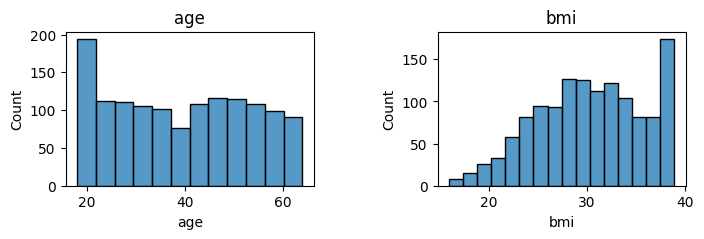

In [20]:
plt.figure(figsize=(8, 2))
for i, col in enumerate(num_col):
    plt.subplot(1, 2, i+1)
    plt.title(f"{col}")
    sns.histplot(x=col, data=df)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [21]:
df.duplicated().sum()
df.drop_duplicates(keep='first', inplace=True)

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
X =df.iloc[:, :-1]
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [24]:
Y = df[['charges']]
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [25]:
Y = df.iloc[:, -1:]
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [26]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from sklearn .preprocessing import MinMaxScaler
col_num_norm = X.select_dtypes(include=['number']).columns
col_num_norm

Index(['age', 'bmi'], dtype='object')

In [28]:
scaler = MinMaxScaler()

In [29]:
X[col_num_norm] = scaler.fit_transform(X[col_num_norm])

In [30]:
X.head()

,age,sex,bmi,children,smoker,region
0,0.021739,female,0.520658,0,yes,southwest
1,0.000000,male,0.776627,1,no,southeast
2,0.217391,male,0.743050,3,no,southeast
3,0.326087,male,0.294124,0,no,northwest
4,0.304348,male,0.563393,0,no,northwest


In [31]:
chk_types(X)

,age,sex,bmi,children,smoker,region
dtypes,float64,category,float64,category,category,category
n_unique,47,2,459,6,2,4


In [32]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from  category_encoders import OneHotEncoder, OrdinalEncoder
cols_to_encoder = ['sex', 'smoker']
ordinal_encoder = OrdinalEncoder(cols=cols_to_encoder)
X = ordinal_encoder.fit_transform(X)
X.head()

,age,sex,bmi,children,smoker,region
0,0.021739,1,0.520658,0,1,southwest
1,0.000000,2,0.776627,1,2,southeast
2,0.217391,2,0.743050,3,2,southeast
3,0.326087,2,0.294124,0,2,northwest
4,0.304348,2,0.563393,0,2,northwest


In [35]:
str_col = ['sex', 'smoker']
encoder = OneHotEncoder(cols=str_col, drop_invariant=True)
X = encoder.fit_transform(X)
X.head()

,age,sex_1,sex_2,bmi,children,smoker_1,smoker_2,region
0,0.021739,1,0,0.520658,0,1,0,1
1,0.000000,0,1,0.776627,1,0,1,2
2,0.217391,0,1,0.743050,3,0,1,2
3,0.326087,0,1,0.294124,0,0,1,3
4,0.304348,0,1,0.563393,0,0,1,3


In [36]:
cols_to_encoder = ['region']   

ordinal_encoder = OrdinalEncoder(cols=cols_to_encoder)  
X = ordinal_encoder.fit_transform(X)  

X.head()

,age,sex_1,sex_2,bmi,children,smoker_1,smoker_2,region
0,0.021739,1,0,0.520658,0,1,0,1
1,0.000000,0,1,0.776627,1,0,1,2
2,0.217391,0,1,0.743050,3,0,1,2
3,0.326087,0,1,0.294124,0,0,1,3
4,0.304348,0,1,0.563393,0,0,1,3
